<a href="https://colab.research.google.com/github/khuramgill/Ai-Labs/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1  Data Preprocessing**

**Question 1: Load and Explore the Datasets**

In [11]:
import pandas as pd
from sklearn.datasets import load_iris, fetch_california_housing

In [13]:
load_iris = load_iris()

In [12]:

iris_df = pd.DataFrame(data=load_iris.data, columns=load_iris.feature_names)


AttributeError: 'function' object has no attribute 'data'

In [17]:
import pandas as pd
from sklearn.datasets import load_iris, fetch_california_housing

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print("Iris Dataset:")
print(iris_df.head())
print("Missing values in Iris Dataset:\n", iris_df.isnull().sum())

iris_features = iris_df.drop('target', axis=1)
iris_target = iris_df['target']


Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Missing values in Iris Dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [16]:
california_housing = fetch_california_housing()

california_housing_df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
california_housing_df['target'] = california_housing.target

print("\nCalifornia Housing Dataset:")
print(california_housing_df.head())
print("Missing values in California Housing Dataset:\n", california_housing_df.isnull().sum())

california_housing_features = california_housing_df.drop('target', axis=1)
california_housing_target = california_housing_df['target']



California Housing Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
Missing values in California Housing Dataset:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


**Question 2: Feature Scaling and Splitting Data**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
iris_features = iris_df.drop('target', axis=1)
iris_target = iris_df['target']
scaler_iris = StandardScaler()
iris_features_scaled = scaler_iris.fit_transform(iris_features)

In [22]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris_features_scaled, iris_target, test_size=0.2, random_state=42
)

In [23]:
print(f"X_train_iris shape: {X_train_iris.shape}, y_train_iris shape: {y_train_iris.shape}")
print(f"X_test_iris shape: {X_test_iris.shape}, y_test_iris shape: {y_test_iris.shape}")

X_train_iris shape: (120, 4), y_train_iris shape: (120,)
X_test_iris shape: (30, 4), y_test_iris shape: (30,)


In [24]:
ch_features = california_housing_df.drop('target', axis=1)
ch_target = california_housing_df['target']

In [26]:
ch_scaler = StandardScaler()
ch_features_scaled = ch_scaler.fit_transform(ch_features)

In [29]:
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(
    ch_features_scaled, ch_target, test_size=0.2, random_state=42
)

In [31]:
print(f"X_train_ch shape:{X_train_ch.shape}, y_train_ch shape: {y_train_ch.shape}")
print(f"X_test_ch shape: {X_test_ch.shape}, y_test_ch shape: {y_test_ch.shape}")

X_train_ch shape:(16512, 8), y_train_ch shape: (16512,)
X_test_ch shape: (4128, 8), y_test_ch shape: (4128,)


# **Task 2: Classification Algorithms**

**Question 3: Apply k-Nearest Neighbors (k-NN) for Classification**

Accuracy for k=1: 0.9667
Accuracy for k=2: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=4: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=6: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=8: 1.0000
Accuracy for k=9: 1.0000
Accuracy for k=10: 1.0000
Accuracy for k=11: 1.0000
Accuracy for k=12: 1.0000
Accuracy for k=13: 1.0000
Accuracy for k=14: 1.0000
Accuracy for k=15: 1.0000


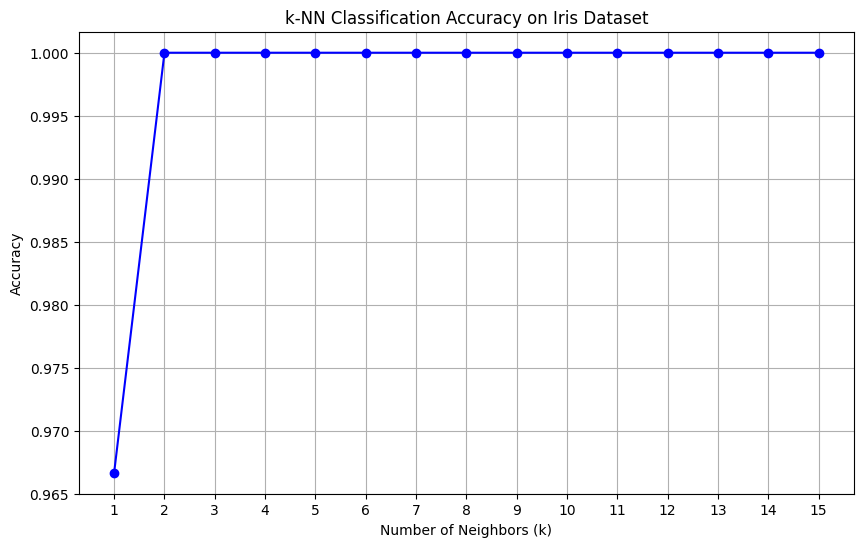

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, y_train_iris)
    y_pred_iris = knn.predict(X_test_iris)
    accuracy = accuracy_score(y_test_iris, y_pred_iris)
    accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Classification Accuracy on Iris Dataset')
plt.xticks(k_values)
plt.grid(True)
plt.show()
